In [2]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

100
[6901, 6701, 4801, 6401, 6801, 6701, 6101, 4401, 7401, 6501, 6501, 6701, 6801, 7101, 7301, 6401, 6601, 6901, 6801, 6501, 6101, 7501, 7701, 7101, 8401, 6401, 6601, 6901, 8101, 6601, 6401, 6701, 6701, 6701, 6501, 6901, 5801, 6001, 5901, 6701, 6401, 6701, 6901, 6801, 6501, 9401, 6601, 7001, 6501, 6601, 6401, 7001, 6701, 6501, 6701, 6701, 6801, 6801, 6801, 6401, 6401, 6501, 6701, 6501, 6501, 5801, 6301, 6701, 6501, 6501, 7201, 6901, 6901, 7401, 7401, 6801, 6901, 6801, 6801, 6601, 6701, 6801, 7101, 7001, 6801, 7401, 7401, 6901, 6801, 6901, 6801, 6701, 6301, 4301, 4001, 4201, 3901, 3701, 4001, 4001]
100
[5801, 5801, 6401, 6101, 7001, 7301, 5201, 7201, 6901, 7201, 5801, 6301, 6301, 6101, 6101, 6801, 7001, 6101, 6501, 6301, 6101, 6401, 6401, 6401, 4601, 4801, 5601, 5501, 6101, 5901, 5601, 5801, 5501, 6501, 6001, 6001, 6101, 5901, 6101, 6201, 2601, 6101, 6001, 4601, 7701, 4601, 6801, 6601, 6201, 7301, 7401, 5901, 6301, 6401, 7201, 7401, 6301, 6501, 7101, 7401, 7501, 5101, 4401, 4701, 4801, 

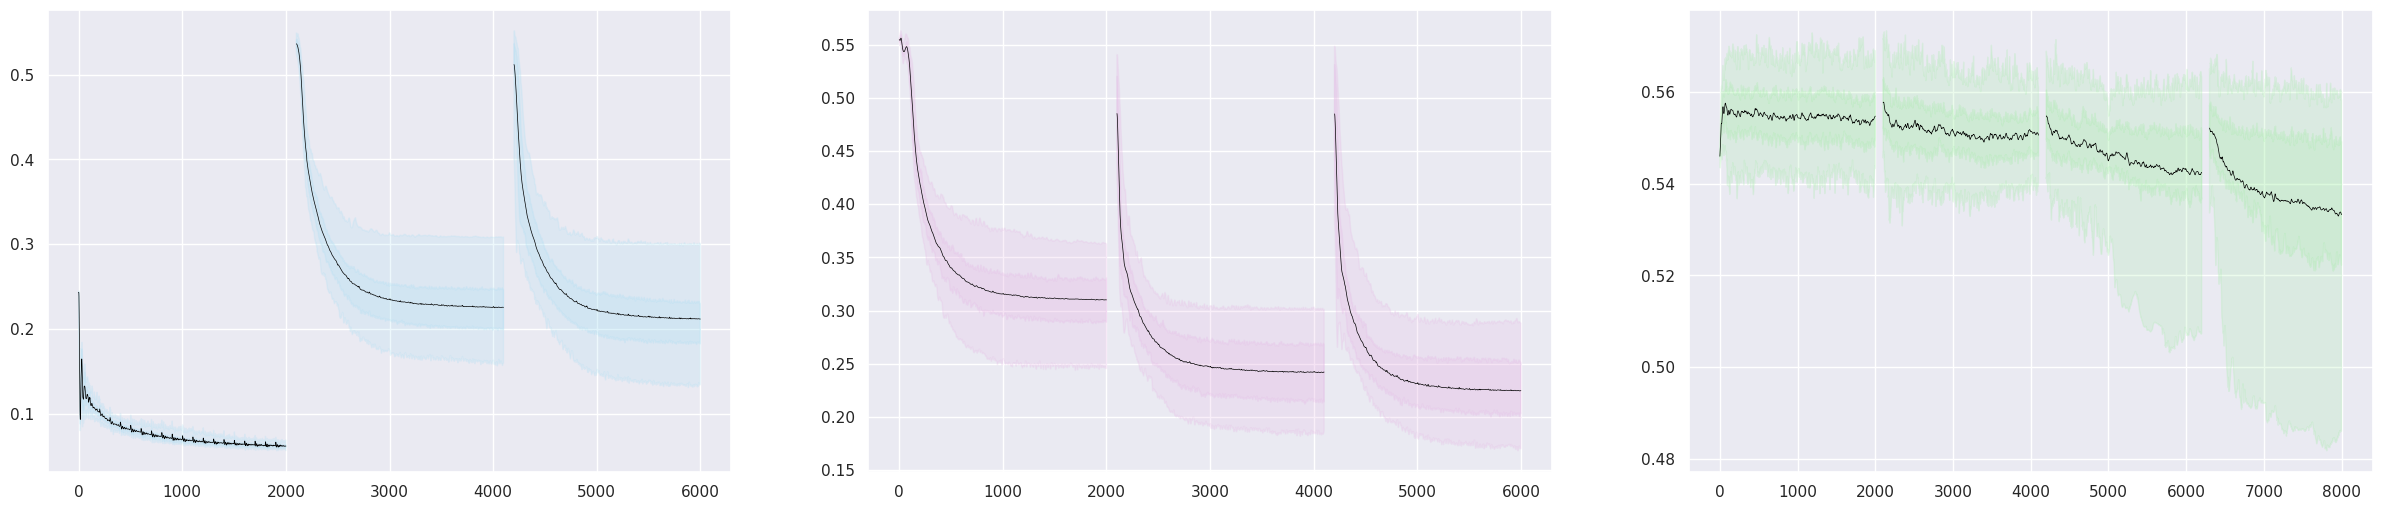

In [5]:
fig, axs = plt.subplots(1,3, figsize=(30,6))

exp_dir = Path("/wynton/group/sali/mhancock/xray/sample_bench/out/3ca7/70_native_2x_2")
ax_id = 0 

colors = ["#a6def2","#e5b3e4", "#9eeea1"]
job_ids = ["0", "20", "31"]
min_lengths = [6000,6000,8000]
    
for i in range(len(job_ids)): 
    job_id = job_ids[i]
    min_length = min_lengths[i]
    
    job_dir = Path(exp_dir, job_id)
    log_dfs = list() 
    for out_dir in job_dir.glob("output*"):
        try: 
            log_df = pd.read_csv(Path(out_dir, "log.csv"))
#             log_df = log_df.iloc[:2000]
        except pd.errors.EmptyDataError: 
            continue 
            
        log_dfs.append(log_df)
        
    print(len(log_dfs))
        
    log_df_lengths = list() 
    for log_df in log_dfs: 
        log_df_lengths.append(len(log_df))

    print(log_df_lengths)

    # Only include log_dfs that are within 95% CI. 
    pruned_log_dfs = list() 
    for log_df in log_dfs: 
#         if len(log_df) > np.percentile(log_df_lengths, 50-95/2, axis=0): 
#             pruned_log_dfs.append(log_df)
        if len(log_df) > min_length: 
            pruned_log_dfs.append(log_df)
        
#     min_length = np.min([len(log_df) for log_df in pruned_log_dfs])
    
    all_curves = np.zeros(shape=[len(pruned_log_dfs), min_length])

    # Populate all curves np matrix. 
    for i in range(len(pruned_log_dfs)):
        log_df = pruned_log_dfs[i]
        all_curves[i] = log_df["r_free_0"].iloc[0:min_length]

    # Plot CIs. 
    for ci in [95,50]: 
        low = np.percentile(all_curves, 50 - ci / 2, axis=0)
        high = np.percentile(all_curves, 50 + ci / 2, axis=0)
        axs[ax_id].fill_between(range(min_length), low, high, color=colors[ax_id], alpha=0.2)

    axs[ax_id].plot(range(min_length), np.mean(all_curves, axis=0), c='black', linewidth=.5)
    ax_id = ax_id+1
    
plt.savefig(Path(Path.home(),"xray/tmp/plot_log.png"))